# Table of Content

- [1.0 Splitting](#1.0)

- [2.0 SGDClassifier (sgdc)](#2.0)

  - [2.1 Build sgdc Model](#2.1)
  - [2.2 Evaluate sgdc Model](#2.2)

- [3.0 SVMClassifier (svc))](#3.0)

  - [3.1 Build svc Model](3.1)
  - [3.2 Evaluate svc Model](#3.2)

- [4.0 Decision-Trees (DTsC)](#4.0)

  - [4.1 Build DTsC Model](#4.1)
  - [4.2 Evaluate DTsC Model](#4.2)

- [5.0 RandomForestClassifier (RFC)](#5.0)

  - [5.1 Build RFC Model](#5.1)
  - [5.2 Evaluate RFC Model](#5.2)

- [6.0 VottingSystemClassifier (VSC)](#6.0)


In [237]:
# algebra
import numpy as np

# dataframes
import pandas as pd

# EDA & visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# log
import math

# spliting and optimizing models
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

# linear model
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
)

# Trees
from sklearn.tree import plot_tree, DecisionTreeClassifier


# Ensembles
from sklearn.ensemble import (
    RandomForestClassifier,
    VotingClassifier,
)

# SVMs
from sklearn.svm import SVC

# Feature preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Model scoring
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
    confusion_matrix,
    classification_report,
)

# model pipelining
from sklearn.pipeline import Pipeline

# Selection

pd.options.display.max_columns = None

In [177]:
heart_df = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/Heart-Disease-Prediction/Prepered data sets/final_dataset.csv"
)

heart_df = heart_df.drop(columns=["Unnamed: 0"], axis=1)
heart_df

,Age,Resting_blood_pressure,cholesterol,Maximum_heart_rate,old_peak,Number_major_vessels,Heart_disease,range_Age,range_Resting_blood_pressure,range_cholesterol,range_Fasting_blood_sugar,range_Maximum_heart_rate,Sex_Male,Chest_pain_Atypical angina,Chest_pain_Non-anginal pain,Chest_pain_Typical angina,Fasting_blood_sugar_True,electrocardiographic_Hypertrophy,electrocardiographic_Normal,Exercise_induced_angina_Yes,Slope_of_peak_exercise_Flat,Slope_of_peak_exercise_Upsloping,stress_test_Normal,stress_test_Not described,stress_test_Reversible defect
0,63,145,233,150,2.3,0,1,3,0,3,3,3,1,0,0,0,1,0,1,0,0,1,0,0,0
1,37,130,250,187,3.5,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
2,41,130,204,172,1.4,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1
3,56,120,236,178,0.8,0,1,3,0,2,2,2,1,1,0,0,0,0,0,0,0,0,0,0,1
4,57,120,354,163,0.6,0,1,3,0,2,2,2,0,0,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,57,140,241,123,0.2,0,0,3,0,2,2,2,0,0,0,1,0,0,0,1,1,0,0,1,0
259,45,110,264,132,1.2,0,0,2,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0
260,68,144,193,141,3.4,2,0,4,0,3,3,3,1,0,0,1,1,0,0,0,1,0,0,1,0
261,57,130,131,115,1.2,1,0,3,0,2,2,2,1,0,0,1,0,0,0,1,1,0,0,1,0


# [1.0 Splitting](#1.0)


In [178]:
features = heart_df.drop(columns=["Heart_disease"], axis=1)
test = heart_df["Heart_disease"]
x_train, x_test, y_train, y_test = train_test_split(
    features, test, test_size=0.35, random_state=42
)
x_train.shape, x_test.shape

((170, 24), (93, 24))

# [2.0 SGDClassifier (sgdc)](#2.0)


### [2.1 Build sgdc Model](#2.1)


In [215]:
def build_SGD(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):
    train_score, test_score, used_alphas = [], [], []

    alpha = [
        0.000001,
        0.000002,
        0.00003,
        0.000003,
        0.00004,
        0.000004,
        0.00005,
        0.000005,
    ]
    alpha.sort()
    for alp in alpha:

        scaler = StandardScaler()
        SGD = SGDClassifier(loss="log_loss", penalty="l2", alpha=alp)

        pip = Pipeline(steps=[("StandardScaler", scaler), ("SGDClassifier", SGD)])

        pip.fit(x_train, y_train)

        train_acc = pip.score(x_train, y_train)
        test_acc = pip.score(x_test, y_test)
        train_score.append(train_acc)
        test_score.append(test_acc)
        used_alphas.append(alp)

    return train_score, test_score, used_alphas


train_score, test_score, used_alphas = build_SGD()

### [2.2 Evaluate sgdc Model](#2.2)


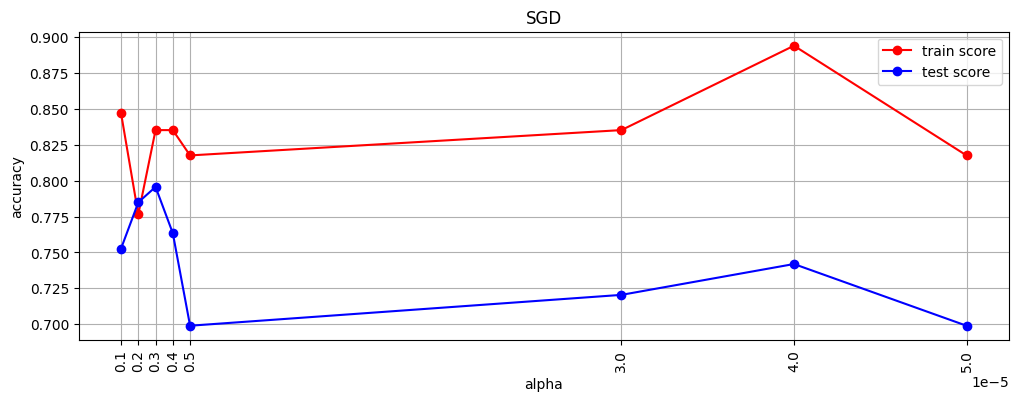

In [216]:
def evaluate_SGD(
    train_score=train_score, test_score=test_score, used_alphas=used_alphas
):
    plt.figure(figsize=(12, 4))

    plt.plot(used_alphas, train_score, color="red", marker="o", label="train score")
    plt.plot(used_alphas, test_score, color="blue", marker="o", label="test score")

    plt.xlabel("alpha")
    plt.ylabel("accuracy")
    plt.title("SGD")
    plt.grid(True)
    plt.xticks(used_alphas, rotation=90)
    plt.legend()
    plt.show()
    return


evaluate_SGD()

In [220]:
scaler = StandardScaler()
SGD = SGDClassifier(loss="log_loss", penalty="l2", alpha=0.0003)

pip = Pipeline(steps=[("StandardScaler", scaler), ("SGDClassifier", SGD)])

pip.fit(x_train, y_train)

train_acc = pip.score(x_train, y_train)
test_acc = pip.score(x_test, y_test)
train_acc, test_acc

(0.8705882352941177, 0.7849462365591398)

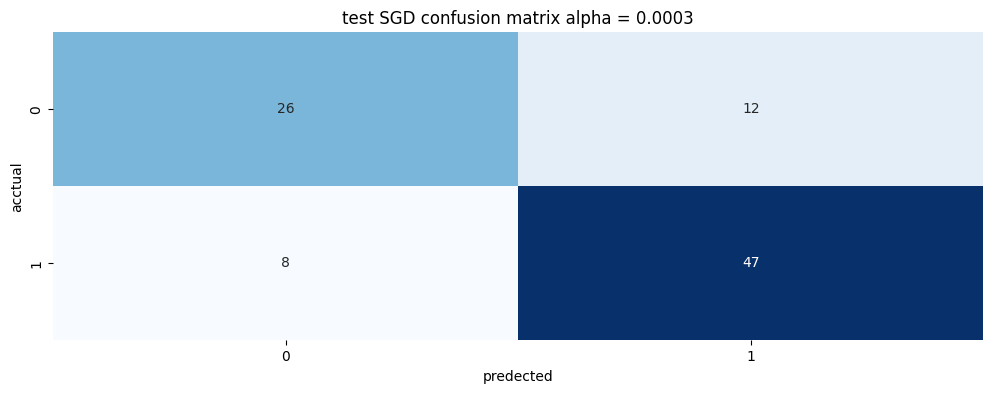

In [221]:
y_pred = pip.predict(x_test)

cm_SGD = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_SGD, annot=True, cmap="Blues", cbar=False)
plt.title("test SGD confusion matrix alpha = 0.0003")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

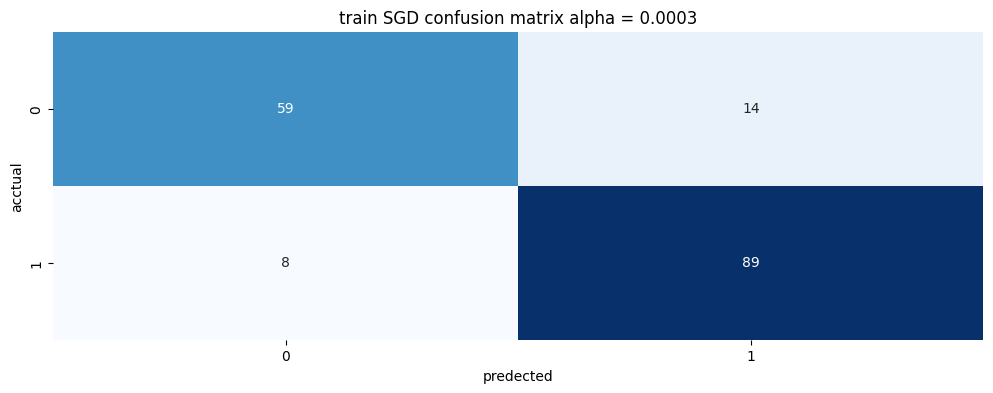

In [223]:
y_pred = pip.predict(x_train)

cm_SGD = confusion_matrix(y_true=y_train, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_SGD, annot=True, cmap="Blues", cbar=False)
plt.title("train SGD confusion matrix alpha = 0.0003")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [184]:
y_pred_train = pip.predict(x_train)
y_pred__test = pip.predict(x_test)

print("Classification Report - Train Data:")
print(classification_report(y_true=y_train, y_pred=y_pred_train))

print("Classification Report - Test Data:")
print(classification_report(y_true=y_test, y_pred=y_pred__test))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84        73
           1       0.85      0.94      0.89        97

    accuracy                           0.87       170
   macro avg       0.88      0.86      0.87       170
weighted avg       0.87      0.87      0.87       170

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        38
           1       0.83      0.87      0.85        55

    accuracy                           0.82        93
   macro avg       0.81      0.80      0.81        93
weighted avg       0.82      0.82      0.82        93



# [3.0 SVMClassifier (svc))](#3.0)


### [3.1 Build svc Model](3.1)


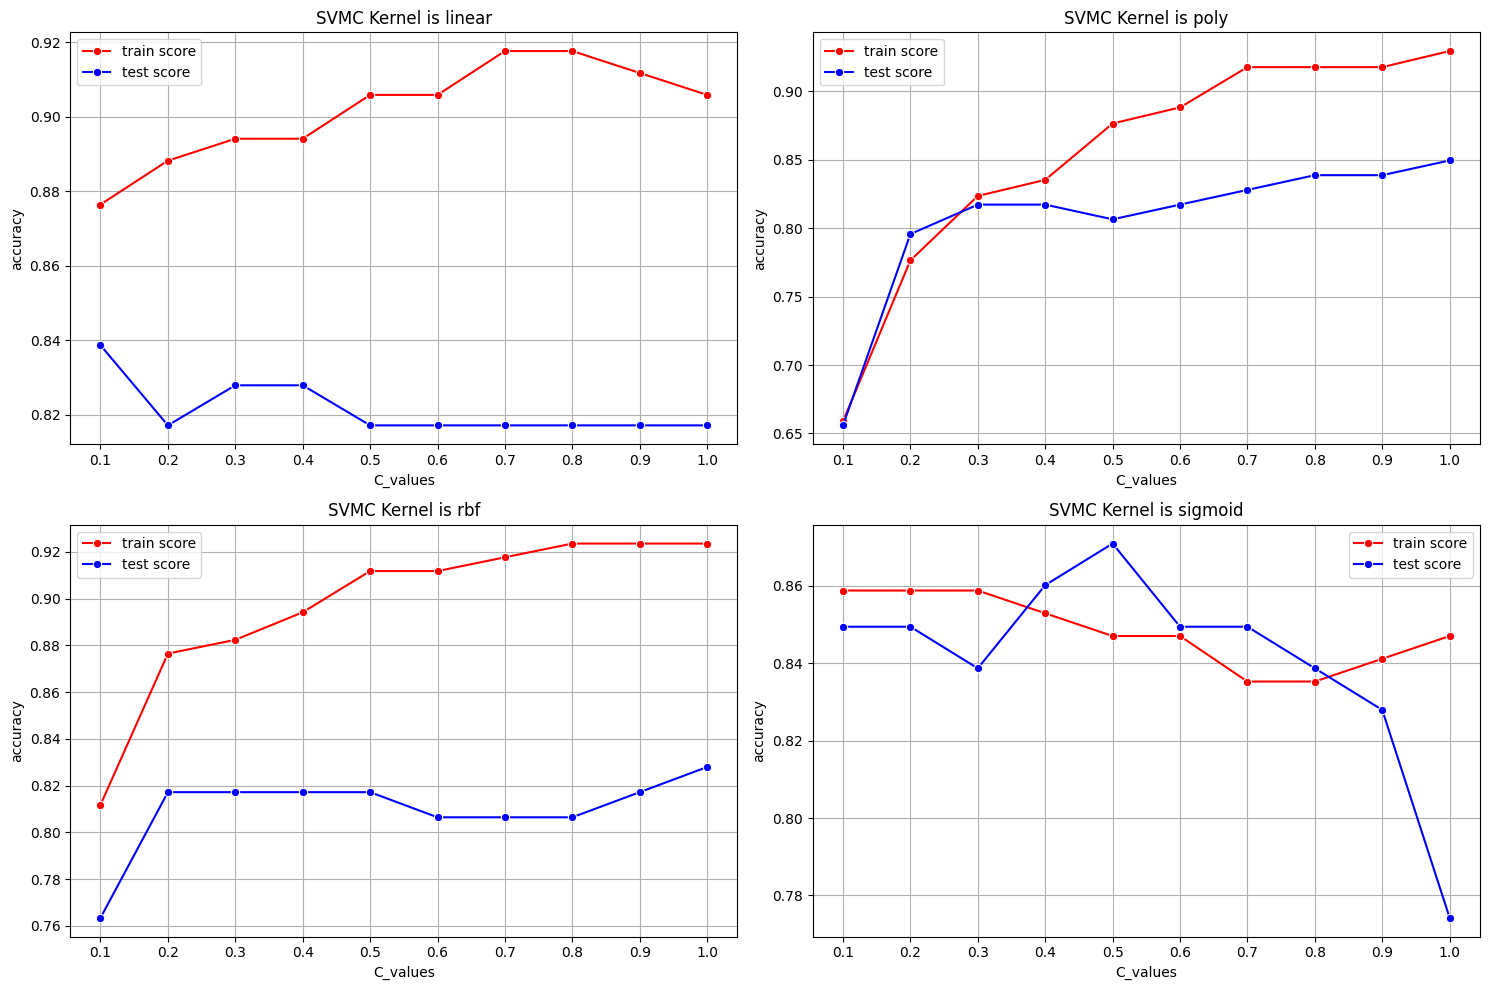

In [185]:
def build_SVM(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):

    C_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    kernels = ["linear", "poly", "rbf", "sigmoid"]

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    for i, ker in enumerate(kernels):
        train_score, test_score = [], []
        for c in C_values:

            deg = 1
            if ker == "poly":
                deg = 3
            scaler = StandardScaler()
            svc = SVC(kernel=ker, C=c, degree=deg)

            pip = Pipeline(steps=[("StandardScaler", scaler), ("SVMClassifire", svc)])

            pip.fit(x_train, y_train)

            train_acc = pip.score(x_train, y_train)
            test_acc = pip.score(x_test, y_test)
            train_score.append(train_acc)
            test_score.append(test_acc)

        row = i // 2
        col = i % 2

        ax = axes[row, col]

        sns.lineplot(
            x=C_values,
            y=train_score,
            color="red",
            marker="o",
            label="train score",
            ax=ax,
        )
        sns.lineplot(
            x=C_values,
            y=test_score,
            color="blue",
            marker="o",
            label="test score",
            ax=ax,
        )

        ax.set_xlabel("C_values")
        ax.set_ylabel("accuracy")
        ax.set_title("SVMC Kernel is " + ker)
        ax.set_xticks(C_values)
        ax.grid(True)

    plt.tight_layout()
    plt.legend()
    plt.show()
    return train_score, test_score, used_alphas


train_score, test_score, used_alphas = build_SVM()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b> best kernel is sigmoid</b><br>
    </span>    
</div>


In [204]:
scaler = StandardScaler()
svc = SVC(kernel="sigmoid", C=0.5, degree=1)

pip = Pipeline(steps=[("StandardScaler", scaler), ("SVMClassifire", svc)])

pip.fit(x_train, y_train)

train_acc = pip.score(x_train, y_train)
test_acc = pip.score(x_test, y_test)
train_acc, test_acc

(0.8470588235294118, 0.8709677419354839)

### [3.2 Evaluate svc Model](#3.2)


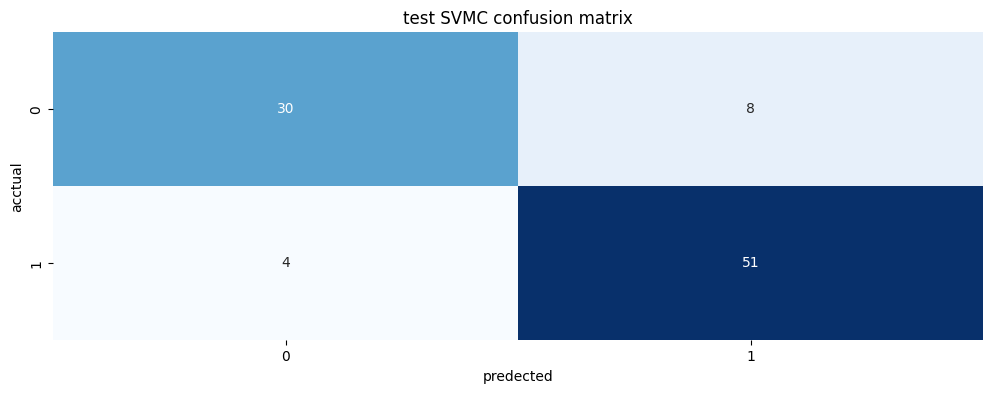

In [205]:
y_pred = pip.predict(x_test)

cm_SVMC = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_SVMC, annot=True, cmap="Blues", cbar=False)
plt.title("test SVMC confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

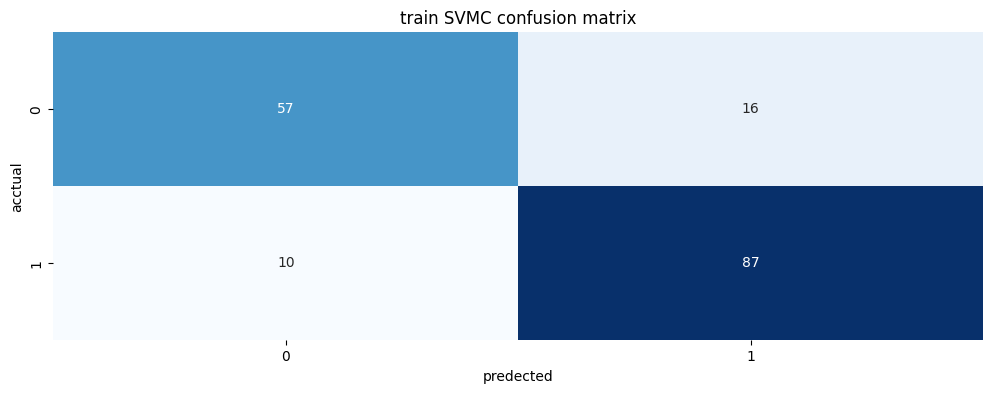

In [206]:
y_pred = pip.predict(x_train)

cm_SVMC = confusion_matrix(y_true=y_train, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_SVMC, annot=True, cmap="Blues", cbar=False)
plt.title("train SVMC confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [207]:
y_pred_train = pip.predict(x_train)
y_pred__test = pip.predict(x_test)

print("Classification Report - Train Data:")
print(classification_report(y_true=y_train, y_pred=y_pred_train))

print("Classification Report - Test Data:")
print(classification_report(y_true=y_test, y_pred=y_pred__test))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        73
           1       0.84      0.90      0.87        97

    accuracy                           0.85       170
   macro avg       0.85      0.84      0.84       170
weighted avg       0.85      0.85      0.85       170

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        38
           1       0.86      0.93      0.89        55

    accuracy                           0.87        93
   macro avg       0.87      0.86      0.86        93
weighted avg       0.87      0.87      0.87        93



# [4.0 Decision-Trees (DTsC)](#4.0)


### [4.1 Build DTsC Model](#4.1)


In [190]:
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(x_train, y_train)
DTC.score(x_train, y_train), DTC.score(x_test, y_test)

(1.0, 0.7419354838709677)

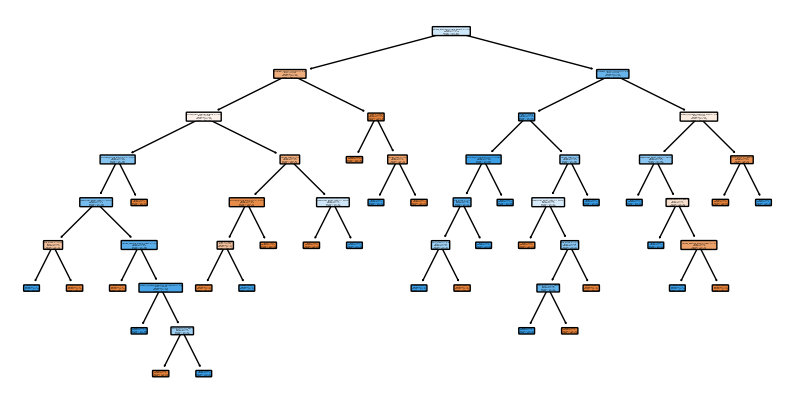

In [191]:
plt.figure(figsize=(10, 5))
plot_tree(
    DTC,
    class_names=["Yes HD", "No HD"],
    filled=True,
    rounded=True,
    feature_names=x_train.columns,
)
plt.show()

In [192]:
DTC.score(x_train, y_train), DTC.score(x_test, y_test)

(1.0, 0.7419354838709677)

In [193]:
path = DTC.cost_complexity_pruning_path(x_train, y_train)
alphas = path.ccp_alphas
alphas = alphas[:-1]

models = []

for alpha in alphas:
    DTC = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    DTC.fit(x_train, y_train)
    models.append(DTC)

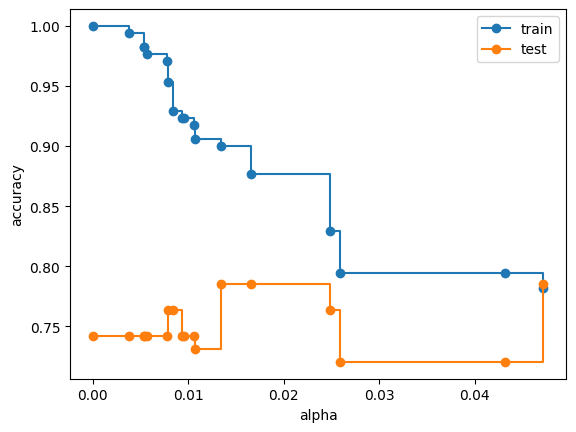

In [194]:
train_score = [DTC_.score(x_train, y_train) for DTC_ in models]
test_score = [DTC_.score(x_test, y_test) for DTC_ in models]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(alphas, train_score, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_score, marker="o", label="test", drawstyle="steps-post")
plt.legend()
plt.show()

<Axes: xlabel='tree'>

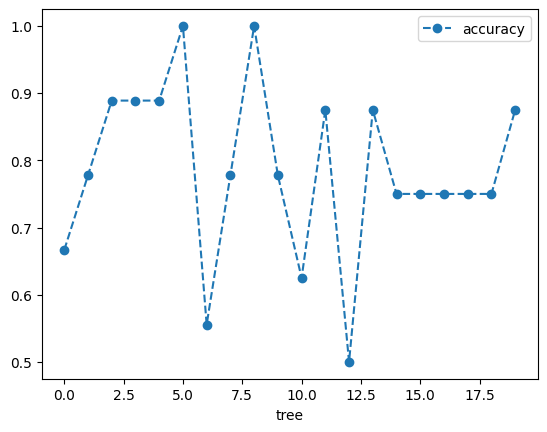

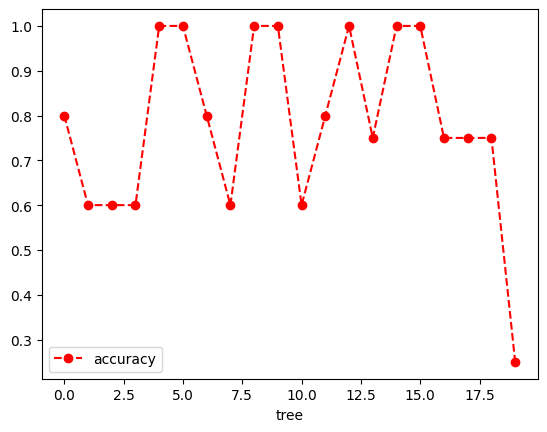

In [195]:
DTC = DecisionTreeClassifier(ccp_alpha=0.013, random_state=42)
score = cross_val_score(DTC, x_train, y_train, cv=20)
score2 = cross_val_score(DTC, x_test, y_test, cv=20)

df_ = pd.DataFrame(data={"tree": range(20), "accuracy": score})
df_2 = pd.DataFrame(data={"tree": range(20), "accuracy": score2})

df_.plot(x="tree", y="accuracy", linestyle="--", marker="o")
df_2.plot(x="tree", y="accuracy", linestyle="--", marker="o", color="red")

<Axes: xlabel='alpha'>

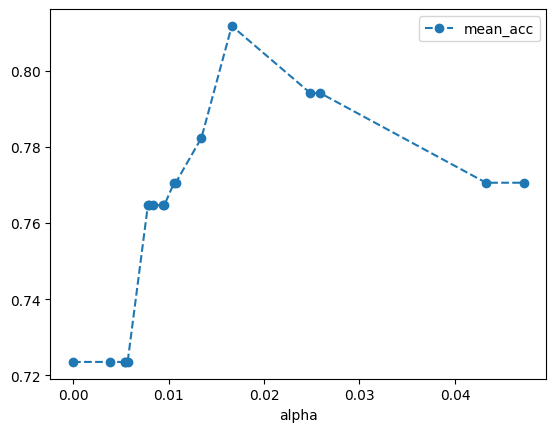

In [196]:
path = DTC.cost_complexity_pruning_path(x_train, y_train)
alphas = path.ccp_alphas
alphas = alphas[:-1]

models = []

for alpha in alphas:
    DTC = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    score = cross_val_score(DTC, x_train, y_train, cv=5)
    models.append([alpha, np.mean(score), np.std(score)])

alpha_results = pd.DataFrame(models, columns=["alpha", "mean_acc", "std"])

alpha_results.plot(x="alpha", y="mean_acc", linestyle="--", marker="o")

In [197]:
alpha = alpha_results[
    (alpha_results["alpha"] > 0.01) & (alpha_results["alpha"] < 0.02)
]["alpha"]
alpha

10    0.010588
11    0.010756
12    0.013445
13    0.016629
Name: alpha, dtype: float64

In [198]:
DTC_pruned = DecisionTreeClassifier(ccp_alpha=0.016629, random_state=42)
DTC_pruned.fit(x_train, y_train)
DTC_pruned.score(x_train, y_train), DTC_pruned.score(x_test, y_test)

(0.8764705882352941, 0.7849462365591398)

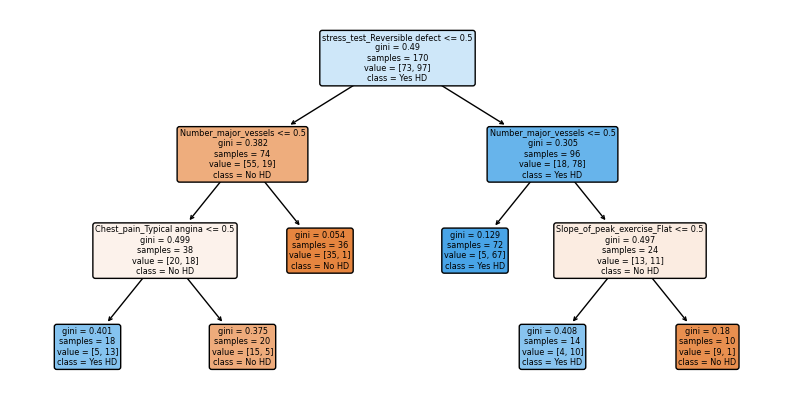

In [199]:
plt.figure(figsize=(10, 5))
plot_tree(
    DTC_pruned,
    class_names=["No HD", "Yes HD"],
    filled=True,
    rounded=True,
    feature_names=x_train.columns,
)
plt.show()

### [4.2 Evaluate DTsC Model](#4.2)


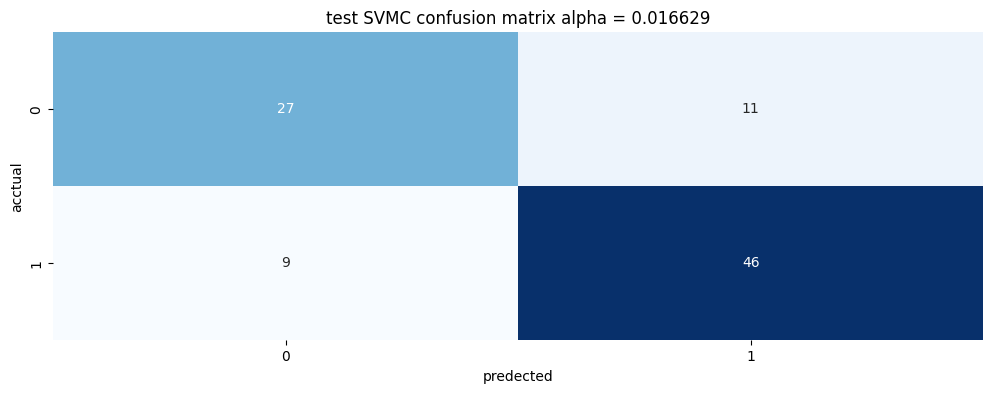

In [200]:
y_pred = DTC_pruned.predict(x_test)

cm_DTC_pruned = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_DTC_pruned, annot=True, cmap="Blues", cbar=False)
plt.title("test SVMC confusion matrix alpha = 0.016629")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

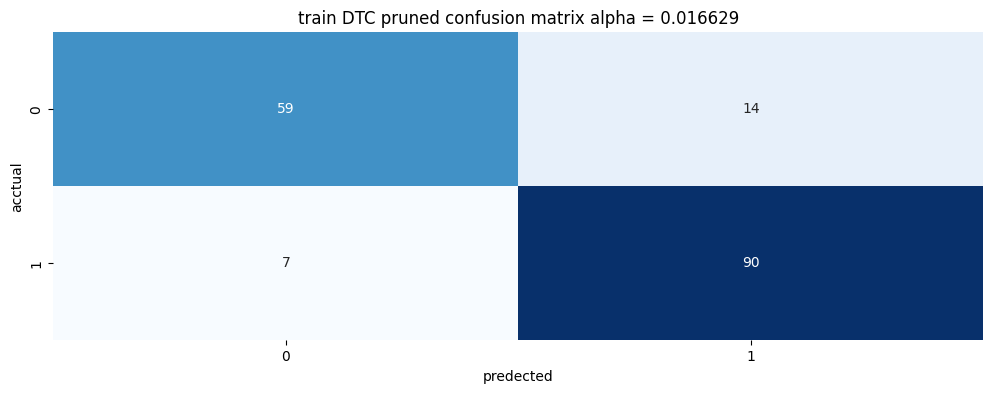

In [201]:
y_pred = DTC_pruned.predict(x_train)

cm_DTC_pruned = confusion_matrix(y_true=y_train, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_DTC_pruned, annot=True, cmap="Blues", cbar=False)
plt.title("train DTC pruned confusion matrix alpha = 0.016629")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [202]:
y_pred_train = DTC_pruned.predict(x_train)
y_pred__test = DTC_pruned.predict(x_test)

print("Classification Report - Train Data:")
print(classification_report(y_true=y_train, y_pred=y_pred_train))

print("Classification Report - Test Data:")
print(classification_report(y_true=y_test, y_pred=y_pred__test))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        73
           1       0.87      0.93      0.90        97

    accuracy                           0.88       170
   macro avg       0.88      0.87      0.87       170
weighted avg       0.88      0.88      0.88       170

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        38
           1       0.81      0.84      0.82        55

    accuracy                           0.78        93
   macro avg       0.78      0.77      0.78        93
weighted avg       0.78      0.78      0.78        93



# [5.0 RandomForestClassifier (RFC)](#5.0)

- [5.2 Evaluate RFC Model](#5.2)


### - [5.1 Build RFC Model](#5.1)


In [224]:
RF = RandomForestClassifier(n_estimators=50, random_state=45)
RF.fit(x_train, y_train)
RF.score(x_train, y_train), RF.score(x_test, y_test)

(1.0, 0.8279569892473119)

In [227]:
param_grid = {
    "max_depth": [25, 30, 31],
    "min_samples_split": [2, 4, 5, 6, 10],
    "min_samples_leaf": [1, 2, 3, 6],
    "ccp_alpha": [0.00001, 0.0000001, 0.00013],
}

RF = RandomForestClassifier(n_estimators=50, random_state=45)


optimized_ridge = GridSearchCV(
    estimator=RF,
    param_grid=param_grid,
    cv=5,
    verbose=3,
)
optimized_ridge.fit(x_train, y_train)

print("best_params_", optimized_ridge.best_params_)
print("best score", optimized_ridge.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=2;, score=0.794 total time=   0.0s
[CV 2/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=2;, score=0.912 total time=   0.0s
[CV 3/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=2;, score=0.735 total time=   0.0s
[CV 4/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=2;, score=0.824 total time=   0.0s
[CV 5/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=2;, score=0.824 total time=   0.0s
[CV 1/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=4;, score=0.853 total time=   0.0s
[CV 2/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=4;, score=0.882 total time=   0.0s
[CV 3/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=4;, score=0.765 total time=   0.0s
[

In [228]:
RF = RandomForestClassifier(
    n_estimators=50,
    random_state=45,
    ccp_alpha=1e-05,
    max_depth=25,
    min_samples_leaf=1,
    min_samples_split=4,
)
RF.fit(x_train, y_train)

RandomForestClassifier(ccp_alpha=1e-05, max_depth=25, min_samples_split=4,
                       n_estimators=50, random_state=45)

In [229]:
RF.score(x_train, y_train), RF.score(x_test, y_test)

(0.9941176470588236, 0.8387096774193549)

### [3.2 Evaluate svc Model](#3.2)


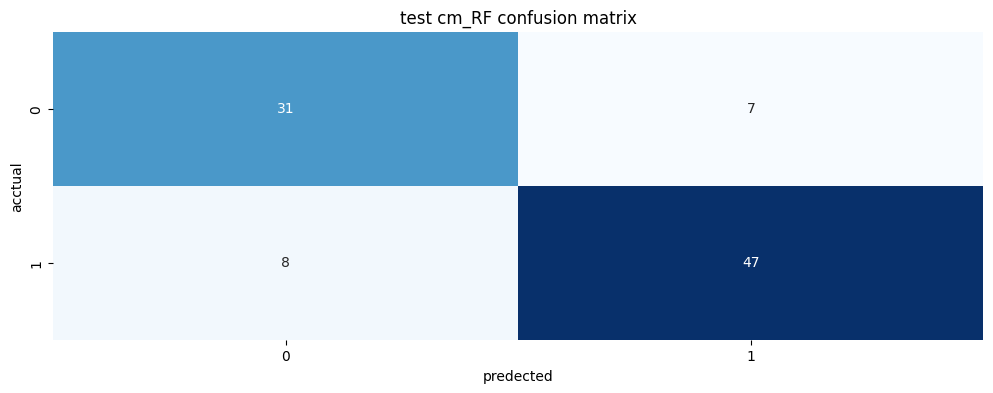

In [231]:
y_pred = RF.predict(x_test)

cm_RF = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_RF, annot=True, cmap="Blues", cbar=False)
plt.title("test cm_RF confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

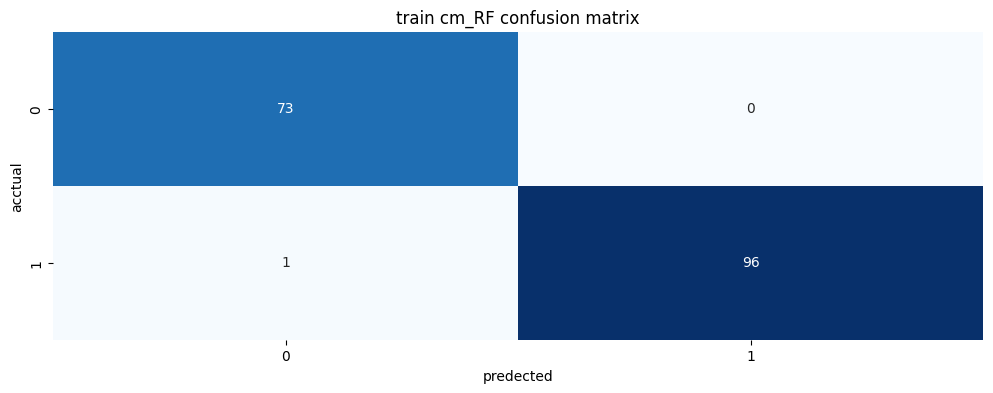

In [233]:
y_pred = RF.predict(x_train)

cm_RF = confusion_matrix(y_true=y_train, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_RF, annot=True, cmap="Blues", cbar=False)
plt.title("train cm_RF confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [235]:
y_pred_train = RF.predict(x_train)
y_pred__test = RF.predict(x_test)

print("Classification Report - Train Data:")
print(classification_report(y_true=y_train, y_pred=y_pred_train))

print("Classification Report - Test Data:")
print(classification_report(y_true=y_test, y_pred=y_pred__test))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        73
           1       1.00      0.99      0.99        97

    accuracy                           0.99       170
   macro avg       0.99      0.99      0.99       170
weighted avg       0.99      0.99      0.99       170

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        38
           1       0.87      0.85      0.86        55

    accuracy                           0.84        93
   macro avg       0.83      0.84      0.83        93
weighted avg       0.84      0.84      0.84        93



# [6.0 VottingSystemClassifier (VSC)](#6.0)


In [248]:
scaler = StandardScaler()
SGD = SGDClassifier(loss="log_loss", penalty="l2", alpha=0.0003)

SGD_pip = Pipeline(steps=[("StandardScaler", scaler), ("SGDClassifier", SGD)])


scaler = StandardScaler()
svc = SVC(kernel="sigmoid", C=0.5, degree=1)

svc_pip = Pipeline(steps=[("StandardScaler", scaler), ("SVMClassifire", svc)])


DTC_pruned = DecisionTreeClassifier(ccp_alpha=0.016629, random_state=42)

RF = RandomForestClassifier(
    n_estimators=50,
    random_state=45,
    ccp_alpha=1e-05,
    max_depth=25,
    min_samples_leaf=1,
    min_samples_split=4,
)


vot = VotingClassifier(
    estimators=[
        ("SGD_pip", SGD_pip),
        ("svc_pip", svc_pip),
        ("DTC_pruned", DTC_pruned),
        ("RF", RF),
    ]
)
vot.fit(x_train, y_train)
vot.score(x_train, y_train), vot.score(x_test, y_test)

(0.9411764705882353, 0.8387096774193549)